# 신뢰구간

## #01. 신뢰구간 개요

표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나

신뢰구간은 주어진 신뢰수준(일반적으로 95% 또는 99% 등)에 따라 모수가 존재할 것으로 예상되는 범위를 나타낸다. 예를 들어, 95% 신뢰구간은 모수가 95% 확률로 해당 구간에 속할 것으로 추정한다.

즉, 모수(모집단의 특성)에 대한 **추정값의 범위**를 제공하여 이를 통해 모평균의 신뢰성을 가늠하기 위해서 사용한다.

신뢰구간은 일반적으로 표본 크기, 추정 방법, 데이터의 변동성 등과 같은 요소에 따라 달라질 수 있으며 정확한 신뢰구간을 구하기 위해서는 통계학적인 가정과 계산 방법을 사용해야 한다.

## #01. 준비작업

### [1] 패키지 참조

`scipy` 패키지의 설치가 필요하다. (이미 앞에서 설치함)

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from math import sqrt
from matplotlib import pyplot as plt
from pandas import read_excel
from scipy.stats import t

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/height.xlsx")
origin

,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169
5,4,남자,175
6,2,남자,179
7,1,여자,166
8,1,남자,169
9,1,남자,164


## #02. 신뢰구간 구하기

### [1] 신뢰구간을 구하는데 필요한 값 산출

#### (1) 신뢰수준과 대상 데이터

In [4]:
clevel = 0.95
data = origin['키']

#### (2) 샘플 사이즈

In [5]:
n = len(data)
n

36

#### (3) 자유도 (degree of freedom)

$총 관측치 - 1$

In [6]:
dof = n - 1
dof

35

#### (4) 표본 평균

In [7]:
sample_mean = data.mean()
sample_mean

167.83333333333334

#### (5) 표본 표준 편차

파이썬에서는 표준편차를 계산할 때, 옵션으로 `ddof`를 사용한다.

`ddof=1`은 표준편차를 계산할 때, `n-1`로 나누라는 의미

In [8]:
sample_std = data.std(ddof=1)
sample_std

7.315345905306578

#### (6) 표본 표준오차

${표준편차 \over \sqrt{샘플크기}}$

>통계학에서 표본의 평균을 추정할 때 발생할 수 있는 불확실성을 측정하는 지표입니다. 표본 표준 오차는 표본의 변동성을 나타내는데, 표본의 크기가 커질수록 표본 표준 오차는 작아지는 경향이 있습니다

In [9]:
# sample_std_error = sample_std / n**0.5

sample_std_error = sample_std / sqrt(n)
sample_std_error

1.2192243175510964

### [2] 신뢰구간

`scipy.stats` 패키지의 `t` 객체가 포함하는 `interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차)` 메서드를 사용한다.

| 파라미터 | 설명 |
|---|---|
| 신뢰도 | `95%`, `90%` 등을 `0~1` 범위 안에서 설정 |
| 자유도 | 통계 모델의 매개변수나 관측치들이 얼마나 자유롭게 변할 수 있는지를 나타내는 값<br/>$전체 데이터 수 - 1$ |
| 샘플평균 | 데이터들의 평균값 |
| 샘플표준오차 | 데이터들의 표준오차 -> ${표준편차 \over \sqrt{샘플크기}}$ | 

In [10]:
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(165.35817637995726, 170.30849028670943)

## #03. 신뢰구간 범위 시각화

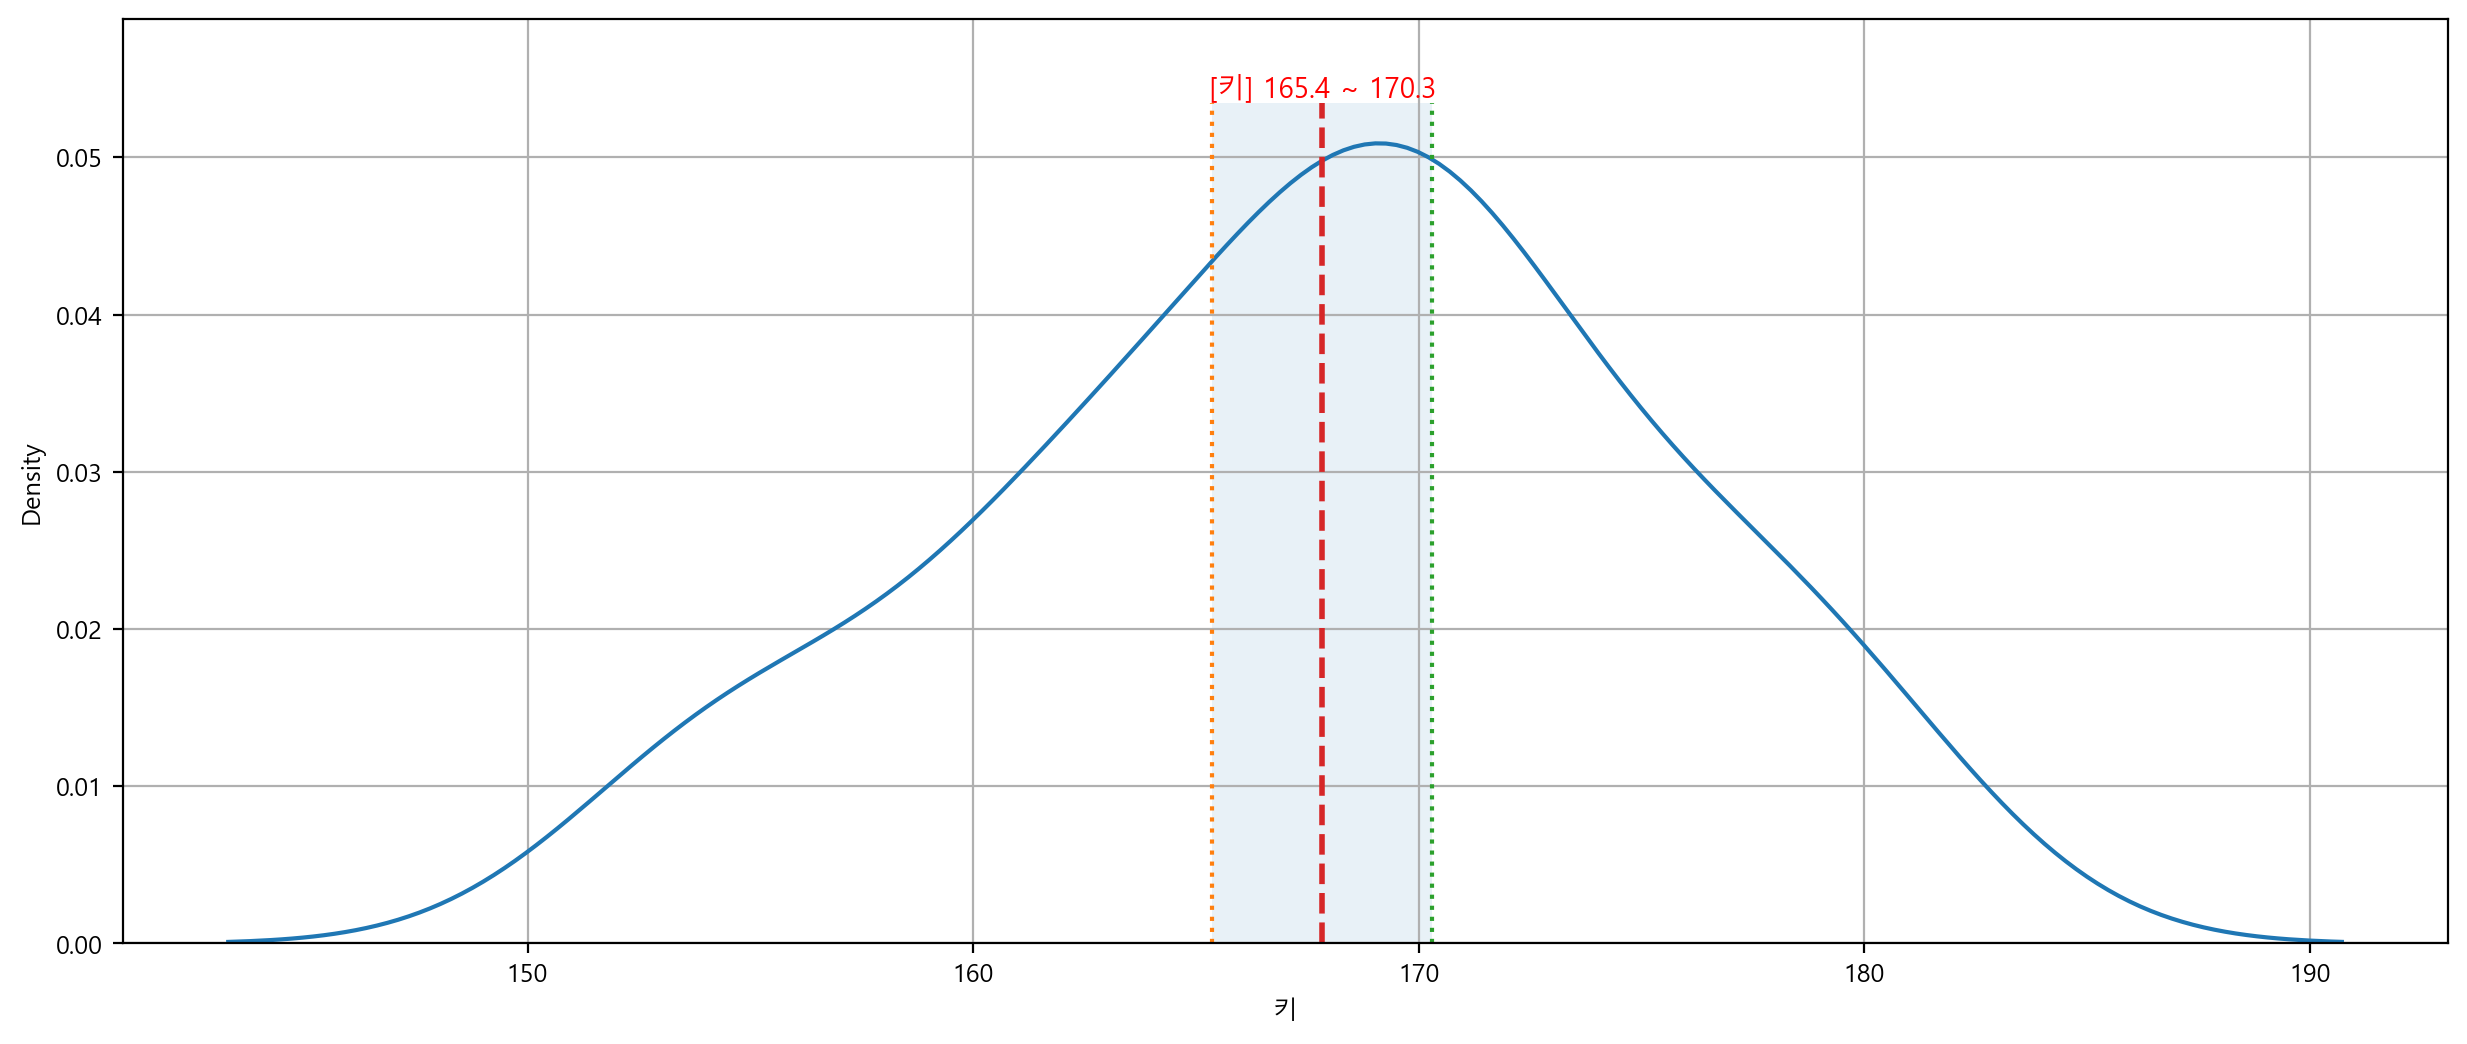

In [11]:
plt.figure()

sb.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
#          x축 좌표(점)     y축 좌표(선)
plt.plot([cmin, cmin], [0, ymax], linestyle=':')
plt.plot([cmax, cmax], [0, ymax], linestyle=':')
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

plt.text(x=(cmax-cmin)/2+cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 10, "color": "red"})

plt.ylim(ymin, ymax*1.1)
plt.grid()
plt.show()
plt.close()